In [1]:
import numpy as np 

import env 
import catalog as Cat
import sham_hack as SHAM
import observables as Obvs

import AbundanceMatching as AM

In [75]:
import corner as DFM

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
subs = Cat.SubhaloHistory(sigma_smhm=0.2, smf_source='li-march', nsnap_ancestor=15)
subcat = subs.Read()

In [106]:
mmaxlim = (subcat['snapshot15_m.max'] > 0) & (subcat['snapshot15_m.star'] > 0)
msham_z1 = subcat['snapshot15_m.star'][mmaxlim]
mhalo_z1 = subcat['snapshot15_halo.m'][mmaxlim]
mmax_z1 = subcat['snapshot15_m.max'][mmaxlim]

In [107]:
print mmax_z1.min(), mmax_z1.max()
print msham_z1.min(), msham_z1.max()

11.0084733963 14.8677968979
6.43802213669 11.8851165771


In [108]:
smhmr = Obvs.Smhmr()
mmid, _, sig_logm, cnts = smhmr.Calculate(mmax_z1, msham_z1)

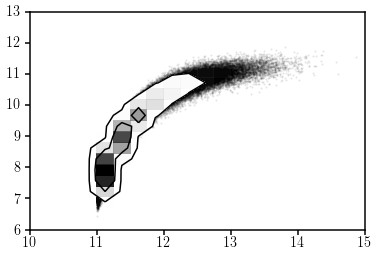

In [109]:
fig = plt.figure()
sub = fig.add_subplot(111)
DFM.hist2d(mmax_z1, msham_z1, levels=[0.68, 0.95], 
           range=[[10., 15.],[6., 13.]], plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)

(0.0, 0.5)

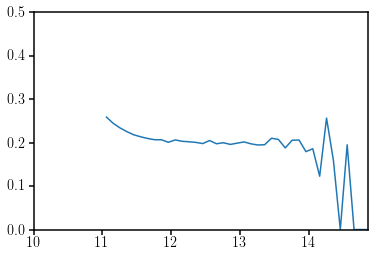

In [110]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(mmid, sig_logm)
sub.set_xlim([10., mmax_z1.max()])
sub.set_ylim([0., 0.5])

(1e-05, 0.03162277660168379)

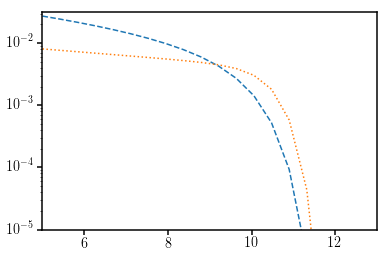

In [111]:
fig = plt.figure()
sub = fig.add_subplot(111)
z = 1.
MF = SHAM.SMFClass('li-march', z, 0.0, 0.7)
sub.plot(np.linspace(5., 13., 20), ([MF.numden(mm) for mm in np.linspace(6., 13., 20)]), ls='--')
sub.plot(np.linspace(5., 13., 20), ([MF.dndm(mm) for mm in np.linspace(6., 13., 20)]), ls=':')
sub.set_xlim([5., 13.])
sub.set_yscale('log')
sub.set_ylim([10**-5., 10**-1.5])

In [112]:
m_arr = np.linspace(6.0, 13.0, 50)
af = AM.AbundanceFunction(m_arr, np.array([MF.dndm(mm) for mm in m_arr]), ext_range=(4., 13.), faint_end_first=True)

(-0.5, 1.0)

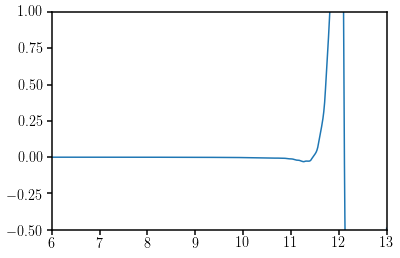

In [113]:
scatter = 0.2
remainder = af.deconvolute(scatter, 20)
x, nd = af.get_number_density_table()
plt.plot(x, remainder/nd)
plt.xlim([6., 13.])
plt.ylim([-0.5, 1.])

In [114]:
nd_halos = AM.calc_number_densities(mmax_z1, 250./0.7)

In [115]:
catalog = af.match(nd_halos)
catalog_sc = af.match(nd_halos, 0.2)

(0.0, 0.5)

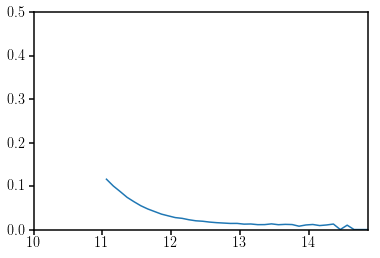

In [116]:
mmid, _, sig_logm, cnts = smhmr.Calculate(mmax_z1, catalog)
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(mmid, sig_logm)
sub.set_xlim([10., mmax_z1.max()])
sub.set_ylim([0., 0.5])

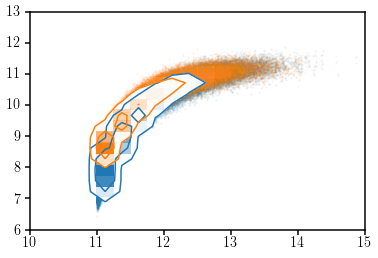

In [117]:
fig = plt.figure()
sub = fig.add_subplot(111)
DFM.hist2d(mmax_z1, msham_z1, levels=[0.68, 0.95], color='C0', 
           range=[[10., 15.],[6., 13.]], plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(mmax_z1, catalog_sc, levels=[0.68, 0.95], color='C1',
           range=[[10., 15.],[6., 13.]], plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)

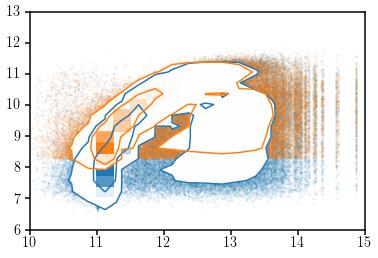

In [120]:
fig = plt.figure()
sub = fig.add_subplot(111)
DFM.hist2d(mhalo_z1, msham_z1, levels=[0.68, 0.95], color='C0', 
           range=[[10., 15.],[6., 13.]], plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)
DFM.hist2d(mhalo_z1, catalog_sc, levels=[0.68, 0.95], color='C1',
           range=[[10., 15.],[6., 13.]], plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub)

(0.0, 0.5)

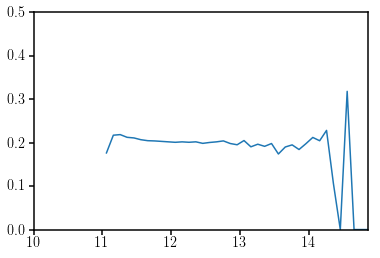

In [121]:
isfin = np.isfinite(catalog_sc)
mmid, _, sig_logm, cnts = smhmr.Calculate(mmax_z1[isfin], catalog_sc[isfin])
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(mmid, sig_logm)
sub.set_xlim([10., mmax_z1.max()])
sub.set_ylim([0., 0.5])